In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 9.71 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 48.4 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-06-01 13:53:38--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::3403:4be7, ...
Connecting to bitbucket.org (bi

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

In [ ]:
total_data= pd.read_csv('/content/drive/MyDrive/얼라이브_final.csv',encoding='utf-8')
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 21980


In [ ]:
total_data['ratings']=total_data['리뷰'].apply(lambda x : int(x[x.find('점')+1]))


In [ ]:
total_data['reviews']=total_data['리뷰'].apply(lambda x : x.replace("더보기",""))
total_data['reviews']=total_data['reviews'].apply(lambda x : x.replace("신고선택",""))
total_data['reviews']=total_data['reviews'].apply(lambda x : x.replace("*",""))
total_data['reviews']=total_data['reviews'].apply(lambda x : x.replace("이미지 펼쳐보기",""))
total_data['reviews']=total_data['reviews'].apply(lambda x : x.replace("0리뷰가 도움이 되었나요?",""))
total_data['reviews']=total_data['reviews'].apply(lambda x : x.replace("사진/비디오",""))

In [ ]:
total_data=total_data[['ratings','reviews']]

In [ ]:
total_data

,ratings,reviews
0,5,리뷰 /접기평점5y4ml22.05.20.: [남성용] 얼라이브포맨60정(30정2개입...
1,5,리뷰 /접기평점5y4ml22.05.20.: [여성용] 얼라이브포우먼60정(30정2개...
2,4,리뷰 /접기평점4su22.05.24.: [남녀공용] 얼라이브 멀티비타민 100정배송...
3,5,리뷰 /접기평점5tldj22.05.20.: [남녀공용] 얼라이브 멀티비타민 100정...
4,5,리뷰 /접기평점5djaa22.05.17.: [여성용] 얼라이브포우먼60정(30정2개...
...,...,...
21975,5,리뷰 /접기평점5ekre21.07.11.: [남녀공용] 얼라이브 멀티비타민100정재...
21976,5,리뷰 /접기평점5saig21.06.28.: [남성용] 얼라이브 포 맨 60정정말 빨...
21977,5,리뷰 /접기평점5sysw21.07.01.: [남성용] 얼라이브 포 맨 60정 2병재...
21978,4,평점4jota21.07.19.: [남성용] 얼라이브 포 맨 60정한달사용기하루한알 ...


In [ ]:
total_data['reviews'].iloc[0]

'리뷰 /접기평점5y4ml22.05.20.: [남성용] 얼라이브포맨60정(30정2개입)비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야\n할갓 같아서 찾아보다가 멀티비타민이란 말에 \n확 질렀어요~\n\n과도한 회사업무로 손목터널증후군도 오고\n외부활동도 없다보니 피로감은 엄청 오는데\n피로회복도 더디고 기력도 없는거예요\n\n확실히 먹었을때와 안먹었을때 활력차이가 느끼지네요~\n피로감이 확실히 덜해요~\n\n유통기한도 넉넉하구요 흡수율도 빠른거 같아요~\n신랑이랑 같이 먹으면 좋을 것 같아요\n\n멀티비타민으로 영양챙길래요!\n배송도 빠르고 유통기한도 넉넉해요\n한알로 건강챙길 수 있으니 너무 만족합니다~\n\n다먹으면 재구매할께요 수5'

In [ ]:
total_data['reviews'].iloc[2]

'리뷰 /접기평점4su22.05.24.: [남녀공용] 얼라이브 멀티비타민 100정배송이 빠른 편이 아닌 것 같고, 생각보다 타블렛이 크고 두꺼워서 단독으로 먹어야 할 것 같습니다. \n그래도 먹어 보고 괜찮으면 재구매 할 생각이에요~\n포 우먼과 고민을 좀 했는데 성분은 크게 차이 없고 철분과 칼슘&마그네슘 차이라 저는 따로 먹을 생각에 기본으로 주문했는데 잘 한 것 같아요.'

In [ ]:
total_data['reviews']=total_data['reviews'].apply(lambda x : x.replace("\n",""))
total_data

,ratings,reviews
0,5,리뷰 /접기평점5y4ml22.05.20.: [남성용] 얼라이브포맨60정(30정2개입...
1,5,리뷰 /접기평점5y4ml22.05.20.: [여성용] 얼라이브포우먼60정(30정2개...
2,4,리뷰 /접기평점4su22.05.24.: [남녀공용] 얼라이브 멀티비타민 100정배송...
3,5,리뷰 /접기평점5tldj22.05.20.: [남녀공용] 얼라이브 멀티비타민 100정...
4,5,리뷰 /접기평점5djaa22.05.17.: [여성용] 얼라이브포우먼60정(30정2개...
...,...,...
21975,5,리뷰 /접기평점5ekre21.07.11.: [남녀공용] 얼라이브 멀티비타민100정재...
21976,5,리뷰 /접기평점5saig21.06.28.: [남성용] 얼라이브 포 맨 60정정말 빨...
21977,5,리뷰 /접기평점5sysw21.07.01.: [남성용] 얼라이브 포 맨 60정 2병재...
21978,4,평점4jota21.07.19.: [남성용] 얼라이브 포 맨 60정한달사용기하루한알 ...


In [ ]:
total_data['reviews']=total_data['reviews'].apply(lambda x : x.split("입)")[-1])
total_data

,ratings,reviews
0,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
1,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
2,4,리뷰 /접기평점4su22.05.24.: [남녀공용] 얼라이브 멀티비타민 100정배송...
3,5,리뷰 /접기평점5tldj22.05.20.: [남녀공용] 얼라이브 멀티비타민 100정...
4,5,얼라이브 비타민 먹다가 다른 비타민으로 잠시 갈아탔었는데요그 비타민은 먹었는데도 오...
...,...,...
21975,5,리뷰 /접기평점5ekre21.07.11.: [남녀공용] 얼라이브 멀티비타민100정재...
21976,5,리뷰 /접기평점5saig21.06.28.: [남성용] 얼라이브 포 맨 60정정말 빨...
21977,5,리뷰 /접기평점5sysw21.07.01.: [남성용] 얼라이브 포 맨 60정 2병재...
21978,4,평점4jota21.07.19.: [남성용] 얼라이브 포 맨 60정한달사용기하루한알 ...


In [ ]:
total_data['reviews']=total_data['reviews'].apply(lambda x : x.split("[남녀공용] 얼라이브 멀티비타민 100정")[-1])
total_data

,ratings,reviews
0,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
1,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
2,4,"배송이 빠른 편이 아닌 것 같고, 생각보다 타블렛이 크고 두꺼워서 단독으로 먹어야 ..."
3,5,재구매몇 년째 얼라이브 주문하는 단골 스토어 입니다. 항상 배송 빠르게 해주셔서 감...
4,5,얼라이브 비타민 먹다가 다른 비타민으로 잠시 갈아탔었는데요그 비타민은 먹었는데도 오...
...,...,...
21975,5,리뷰 /접기평점5ekre21.07.11.: [남녀공용] 얼라이브 멀티비타민100정재...
21976,5,리뷰 /접기평점5saig21.06.28.: [남성용] 얼라이브 포 맨 60정정말 빨...
21977,5,리뷰 /접기평점5sysw21.07.01.: [남성용] 얼라이브 포 맨 60정 2병재...
21978,4,평점4jota21.07.19.: [남성용] 얼라이브 포 맨 60정한달사용기하루한알 ...


In [ ]:
total_data['reviews']=total_data['reviews'].apply(lambda x : x.split("[남녀공용] 얼라이브 멀티비타민100정")[-1])
total_data

,ratings,reviews
0,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
1,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
2,4,"배송이 빠른 편이 아닌 것 같고, 생각보다 타블렛이 크고 두꺼워서 단독으로 먹어야 ..."
3,5,재구매몇 년째 얼라이브 주문하는 단골 스토어 입니다. 항상 배송 빠르게 해주셔서 감...
4,5,얼라이브 비타민 먹다가 다른 비타민으로 잠시 갈아탔었는데요그 비타민은 먹었는데도 오...
...,...,...
21975,5,재구매매일 먹는거라서 먹어요
21976,5,리뷰 /접기평점5saig21.06.28.: [남성용] 얼라이브 포 맨 60정정말 빨...
21977,5,리뷰 /접기평점5sysw21.07.01.: [남성용] 얼라이브 포 맨 60정 2병재...
21978,4,평점4jota21.07.19.: [남성용] 얼라이브 포 맨 60정한달사용기하루한알 ...


In [ ]:
total_data['reviews']=total_data['reviews'].apply(lambda x : x.split("[남성용] 얼라이브 포 맨 60정")[-1])
total_data

,ratings,reviews
0,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
1,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
2,4,"배송이 빠른 편이 아닌 것 같고, 생각보다 타블렛이 크고 두꺼워서 단독으로 먹어야 ..."
3,5,재구매몇 년째 얼라이브 주문하는 단골 스토어 입니다. 항상 배송 빠르게 해주셔서 감...
4,5,얼라이브 비타민 먹다가 다른 비타민으로 잠시 갈아탔었는데요그 비타민은 먹었는데도 오...
...,...,...
21975,5,재구매매일 먹는거라서 먹어요
21976,5,정말 빨리왔어요. 빠른 배송 감사합니다
21977,5,2병재구매혀과가 좋아요 재구매 예정입니다
21978,4,한달사용기하루한알 간편하게 먹기편하네요 좀더 꾸준히 먹어야 효과를 볼런지 아직은 잘...


In [ ]:
bad_data= pd.read_csv('/content/drive/MyDrive/비타민_피로회복제.csv',encoding='utf-8')
print('나쁜 리뷰 개수 :',len(bad_data)) 

나쁜 리뷰 개수 : 3768


In [ ]:
bad_data=bad_data[['점수','리뷰']]
bad_data

,점수,리뷰
0,1,아이들이 맛있어 하네요~\n담에 또 구매할꺼예요~!
1,1,기존에 먹고잇는데 비타민디는 제가먹을려구 또구매햇어요~~행사중이라 가성비가 좋아요
2,1,택배발송후에 소독.방역을 한다고 며칠간 창고에 있었던점이 걸립니다. 답변도 대충하고
3,1,배송 9일 걸렸습니다
4,1,유통기한확인못해서 잘몰라여 사탕이네여 전혀 효과없을듯해여
...,...,...
3763,3,늘먹던거예요 좋아요
3764,3,이거 왜 사이즈가 다르죠??같이 구매한건데 유통기한도 차이가나고 여러번 주문했지만 ...
3765,3,포장상태좋고 세일할때쟁입니다
3766,3,잘받았습니다.\n효과좋았으면 해요^^


In [ ]:
bad_data.columns=['ratings','reviews']
bad_data

,ratings,reviews
0,1,아이들이 맛있어 하네요~\n담에 또 구매할꺼예요~!
1,1,기존에 먹고잇는데 비타민디는 제가먹을려구 또구매햇어요~~행사중이라 가성비가 좋아요
2,1,택배발송후에 소독.방역을 한다고 며칠간 창고에 있었던점이 걸립니다. 답변도 대충하고
3,1,배송 9일 걸렸습니다
4,1,유통기한확인못해서 잘몰라여 사탕이네여 전혀 효과없을듯해여
...,...,...
3763,3,늘먹던거예요 좋아요
3764,3,이거 왜 사이즈가 다르죠??같이 구매한건데 유통기한도 차이가나고 여러번 주문했지만 ...
3765,3,포장상태좋고 세일할때쟁입니다
3766,3,잘받았습니다.\n효과좋았으면 해요^^


In [ ]:
total_data

,ratings,reviews
0,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
1,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
2,4,"배송이 빠른 편이 아닌 것 같고, 생각보다 타블렛이 크고 두꺼워서 단독으로 먹어야 ..."
3,5,재구매몇 년째 얼라이브 주문하는 단골 스토어 입니다. 항상 배송 빠르게 해주셔서 감...
4,5,얼라이브 비타민 먹다가 다른 비타민으로 잠시 갈아탔었는데요그 비타민은 먹었는데도 오...
...,...,...
3763,3,늘먹던거예요 좋아요
3764,3,이거 왜 사이즈가 다르죠??같이 구매한건데 유통기한도 차이가나고 여러번 주문했지만 ...
3765,3,포장상태좋고 세일할때쟁입니다
3766,3,잘받았습니다.\n효과좋았으면 해요^^


In [ ]:
total_data=total_data[:4000]

In [ ]:
total_data=pd.concat((total_data,bad_data))
total_data

,ratings,reviews
0,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
1,5,비타민만 챙겨먹다가 아무래도 다른 영양제도 먹어야할갓 같아서 찾아보다가 멀티비타민이...
2,4,"배송이 빠른 편이 아닌 것 같고, 생각보다 타블렛이 크고 두꺼워서 단독으로 먹어야 ..."
3,5,재구매몇 년째 얼라이브 주문하는 단골 스토어 입니다. 항상 배송 빠르게 해주셔서 감...
4,5,얼라이브 비타민 먹다가 다른 비타민으로 잠시 갈아탔었는데요그 비타민은 먹었는데도 오...
...,...,...
3763,3,늘먹던거예요 좋아요
3764,3,이거 왜 사이즈가 다르죠??같이 구매한건데 유통기한도 차이가나고 여러번 주문했지만 ...
3765,3,포장상태좋고 세일할때쟁입니다
3766,3,잘받았습니다.\n효과좋았으면 해요^^


In [ ]:
total_data['label']=total_data['ratings'].apply(lambda x :  1 if x==5 else (0 if x <3 else 'delete'))

In [ ]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(5, 6946, 3)

In [ ]:
total_data.drop_duplicates(subset=['reviews'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 6946


In [ ]:
print(total_data.isnull().values.any())

False


In [ ]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 5209
테스트용 리뷰의 개수 : 1737


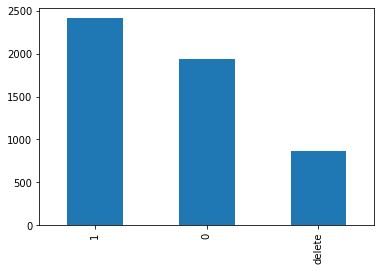

In [ ]:
train_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
train_data.reset_index()

,index,ratings,reviews,label
0,2141,5,리뷰 /접기평점59kjh22.03.13.: [여성용] 얼라이브 포 우먼 60정하루에...,1
1,2515,5,한달사용기너무너무 만족합니다!!이 구매자의 처음 리뷰보기,1
2,3422,1,사은품때문에 5박스나 주문했는데 본품만 배송되었습니다.\n약속한데로 각각의 사은품 ...,0
3,3549,1,사은품 준다 해놓고 안줌,0
4,3429,1,월요일부터 전혀 움직이지 않음. 배송 그지같음.,0
...,...,...,...,...
5204,220,2,먹기편한데 아이는 먹기싫어해요 시다고 재구매는 못할꺼같아요,0
5205,1672,3,부모님께 좋은 효과가 있길 바란다,delete
5206,1707,1,합성 착향료 맛 밖에는 안나요. ㅜ.ㅜ 시중에 파는 일반 젤리보다도 맛이 .... ...,0
5207,1877,2,여섯알이나 한번에 먹어야되서 힘들어요,0


In [ ]:
good_data=train_data[train_data['label']==1]
good_data

,ratings,reviews,label
2141,5,리뷰 /접기평점59kjh22.03.13.: [여성용] 얼라이브 포 우먼 60정하루에...,1
2515,5,한달사용기너무너무 만족합니다!!이 구매자의 처음 리뷰보기,1
2192,5,리뷰 /접기평점5cute22.03.07.: [남녀공용] 얼라이브 밀크씨슬빠른 배송 ...,1
367,5,평점5bboy22.05.14.: [남녀공용] 얼라이브 멀티비타민 60정재구매입니다....,1
1751,5,평점5tlsl22.04.18.: [실버] 얼라이브 50+한달사용기계속 얼라이브만 먹...,1
...,...,...,...
3571,5,남편 위해서 샀는데 먹고나니까 확실히 몸이 가볍대요~,1
3869,5,"한달사용기포장 굿, 먹기 편하고, 유통기한 넉넉~~이 구매자의 처음 리뷰보기",1
510,5,한달사용기먹기에 좀 크긴 하지만 좋은제품 빠른배송 좋습니다.이 구매자의 처음 리뷰보기,1
3469,5,재구매가성비좋고 먹기편해 항상이용하고있습니다,1


In [ ]:
bad_data=train_data[train_data['label']==0]
bad_data

,ratings,reviews,label
3422,1,사은품때문에 5박스나 주문했는데 본품만 배송되었습니다.\n약속한데로 각각의 사은품 ...,0
3549,1,사은품 준다 해놓고 안줌,0
3429,1,월요일부터 전혀 움직이지 않음. 배송 그지같음.,0
1347,2,상품 개봉하자마자 깨진약이 들어있네요 기분이 별로 좋지않습니다 다음부턴 하자없는 제...,0
1756,2,타제품보다 맛이 없었어요.아이가 먹기 싫어해요.\n젤리형태입니다.,0
...,...,...,...
2905,2,"다른 영양제 먹일떄는 안 그렇던데 \n하루에 한포씩 먹였는데, 설사를 하네요",0
2253,2,물에 잘 녹지 않아요\n,0
220,2,먹기편한데 아이는 먹기싫어해요 시다고 재구매는 못할꺼같아요,0
1707,1,합성 착향료 맛 밖에는 안나요. ㅜ.ㅜ 시중에 파는 일반 젤리보다도 맛이 .... ...,0


In [ ]:
train_data=pd.concat((good_data,bad_data))

In [ ]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0   1935
1      1   2412


In [ ]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는 게 나을 뻔'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '뻔']


In [ ]:
stopwords = ['5','정','접','/','21','평점','?','병',',','합니다','좋','못','10','구매자','서','사','공용','여성','우먼','지만','저','아서','제품','달사','되','시','해서','어','받','좀','22','만','나','때','맞','으로','것','했','시','잘','아요','포',']','요','면', '거','..','[','으면','60','로','이브',':','었','있','도', '어요','습니다','는', '용','다', '의', '가', '이','보', '은','.', '한', '리뷰','에', '하', '고', '을','얼라', '를', '인', '듯', '과', '기','와','비타민', '네', '들', '듯', '지', '임', '게','먹','네요','는데','같','겠']

In [ ]:
train_data['tokenized'] = train_data['reviews'].apply(mecab.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
test_data['tokenized'] = test_data['reviews'].apply(mecab.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [ ]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [ ]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('안', 546), ('배송', 375), ('너무', 353), ('없', 255), ('알', 248), ('구매', 246), ('맛', 242), ('주', 187), ('어서', 170), ('않', 168), ('았', 157), ('택배', 142), ('아이', 137), ('ㅠㅠ', 137), ('그냥', 136), ('일', 136), ('주문', 134), ('아', 133), ('니', 131), ('개', 129)]


In [ ]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('구매', 1265), ('재', 703), ('처음', 578), ('배송', 451), ('03', 420), ('용기', 364), ('사용', 353), ('달', 343), ('!', 332), ('기재', 317), ('남녀', 298), ('2', 282), ('빠르', 265), ('04', 259), ('항상', 249), ('개', 233), ('~', 209), ('꾸준히', 194), ('입니다', 193), ('멀티', 192)]


긍정 리뷰의 평균 길이 : 9.357794361525706
부정 리뷰의 평균 길이 : 14.568992248062015


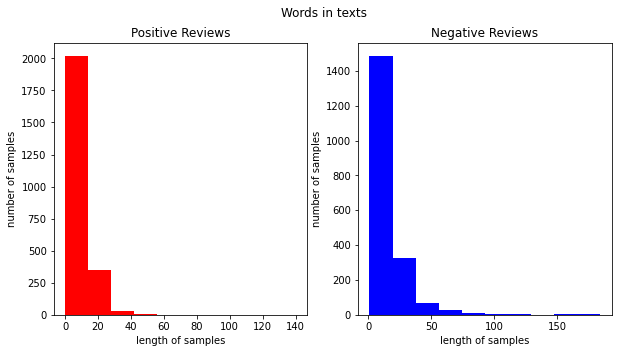

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [ ]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 5825
등장 빈도가 1번 이하인 희귀 단어의 수: 3006
단어 집합에서 희귀 단어의 비율: 51.60515021459228
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.921752492021591


In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2821


In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

리뷰의 최대 길이 : 184
리뷰의 평균 길이 : 11.677478720956982


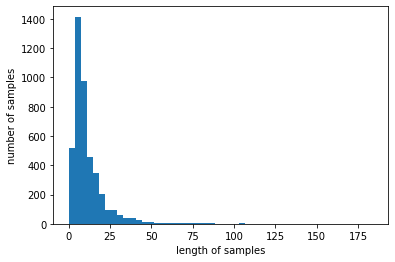

In [ ]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 99.44789510006902


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train.astype(float), y_train.astype(float), epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
55/55 [==============================] - ETA: 0s - loss: 0.4191 - acc: 0.7961
Epoch 1: val_acc improved from -inf to 0.84943, saving model to best_model.h5
55/55 [==============================] - 12s 168ms/step - loss: 0.4191 - acc: 0.7961 - val_loss: 0.4062 - val_acc: 0.8494
Epoch 2/15
55/55 [==============================] - ETA: 0s - loss: 0.1931 - acc: 0.9267
Epoch 2: val_acc improved from 0.84943 to 0.87356, saving model to best_model.h5
55/55 [==============================] - 9s 166ms/step - loss: 0.1931 - acc: 0.9267 - val_loss: 0.3387 - val_acc: 0.8736
Epoch 3/15
55/55 [==============================] - ETA: 0s - loss: 0.1396 - acc: 0.9482
Epoch 3: val_acc improved from 0.87356 to 0.90230, saving model to best_model.h5
55/55 [==============================] - 12s 217ms/step - loss: 0.1396 - acc: 0.9482 - val_loss: 0.2458 - val_acc: 0.9023
Epoch 4/15
55/55 [==============================] - ETA: 0s - loss: 0.1230 - acc: 0.9525
Epoch 4: val_acc improved from 0.90230 

In [ ]:
loaded_model = load_model('best_model.h5')

In [ ]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = mecab.morphs(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [ ]:
#썸트렌드 데이터 넣기!

In [ ]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')

63.95% 확률로 긍정 리뷰입니다.


In [ ]:
sentiment_predict('알이 너무 커요')

98.51% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict('구려')

96.27% 확률로 부정 리뷰입니다.


In [ ]:
sentiment_predict('피로')

64.85% 확률로 부정 리뷰입니다.
